In [1]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
#1. Load Data
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
import math
print(math.log(452600))

13.022764012181574


In [13]:
california_housing.data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [15]:
print(california_housing.data.shape)
print(california_housing.target.shape)

(20640, 8)
(20640,)


In [16]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [21]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)
california_df = pd.DataFrame(california_housing.data,
                             columns=california_housing.feature_names)
california_df['MedHouseValue'] = pd.Series(california_housing.target)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [25]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [26]:
#2. Handle missing values :

california_df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [27]:
#3. Standardize data :
# Get column names first
names = california_df.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(california_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,2.3448,0.9821,0.6286,-0.1538,-0.9744,-0.0496,1.0525,-1.3278,2.1296
1,2.3322,-0.6070,0.3270,-0.2633,0.8614,-0.0925,1.0432,-1.3228,1.3142
2,1.7827,1.8562,1.1556,-0.0490,-0.8208,-0.0258,1.0385,-1.3328,1.2587
3,0.9330,1.8562,0.1570,-0.0498,-0.7660,-0.0503,1.0385,-1.3378,1.1651
4,-0.0129,1.8562,0.3447,-0.0329,-0.7598,-0.0856,1.0385,-1.3378,1.1729


In [28]:
# 4. visualize relationship between features and target :
scaled_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

<Axes: xlabel='MedInc', ylabel='MedHouseValue'>

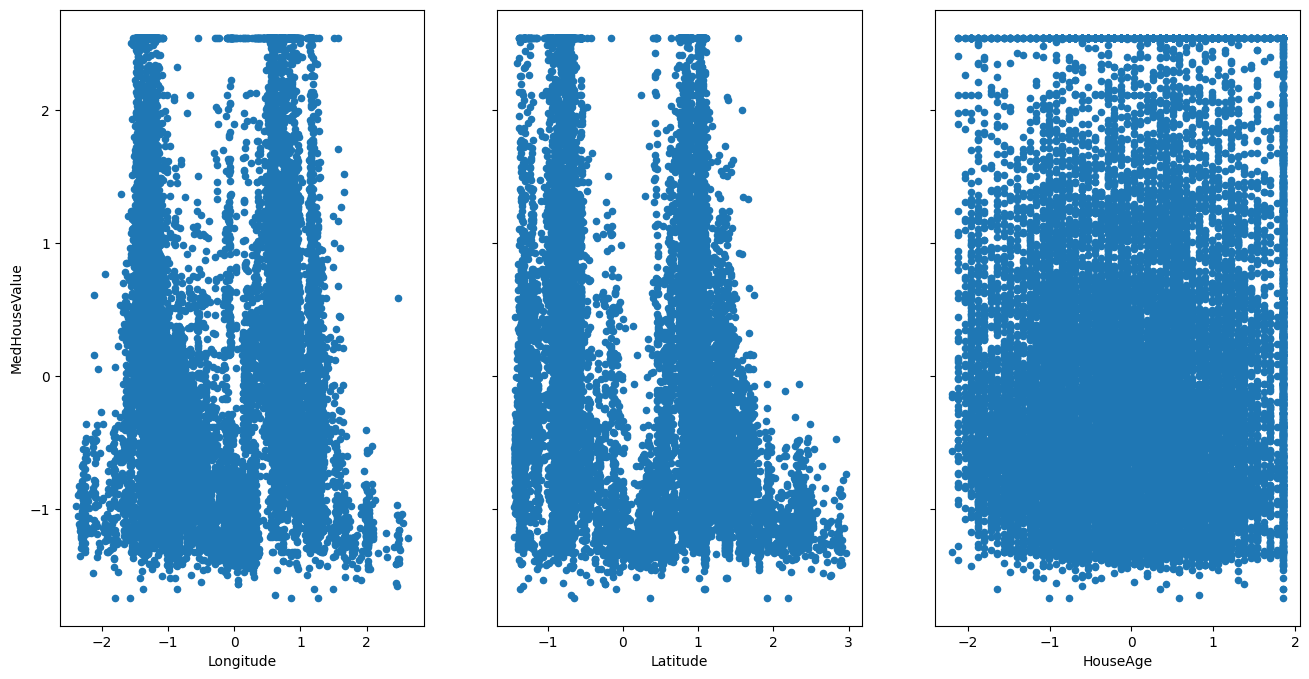

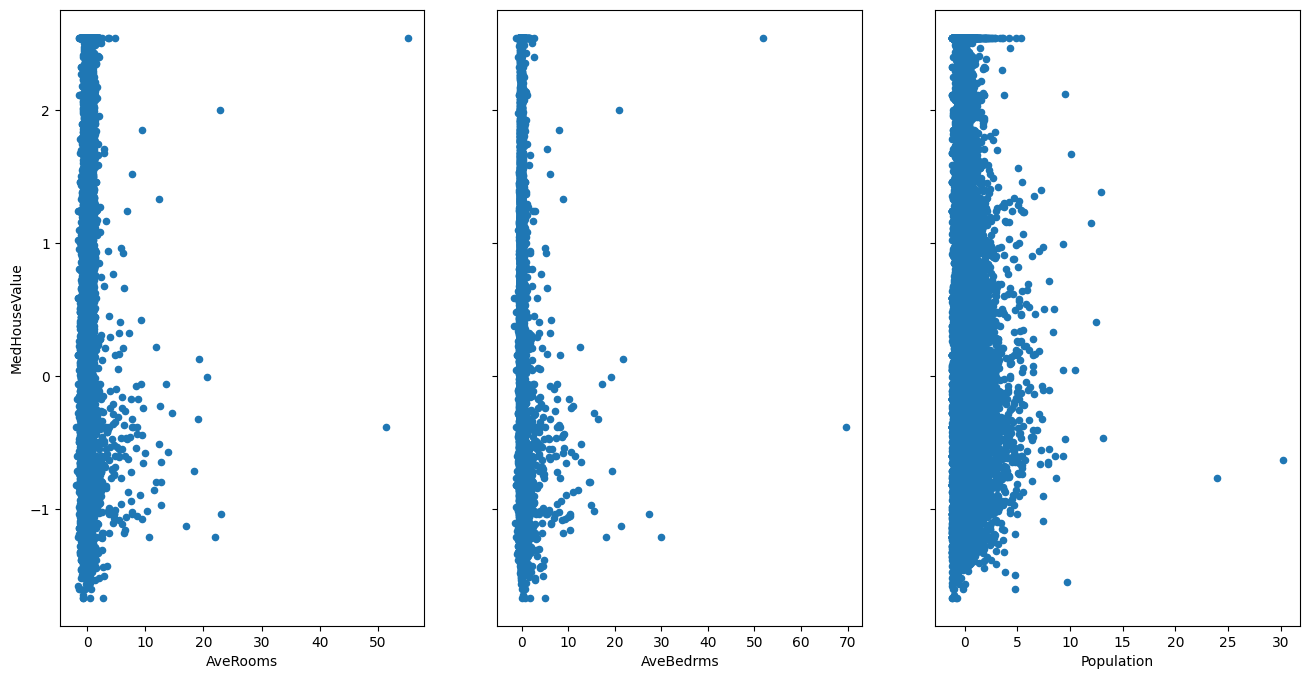

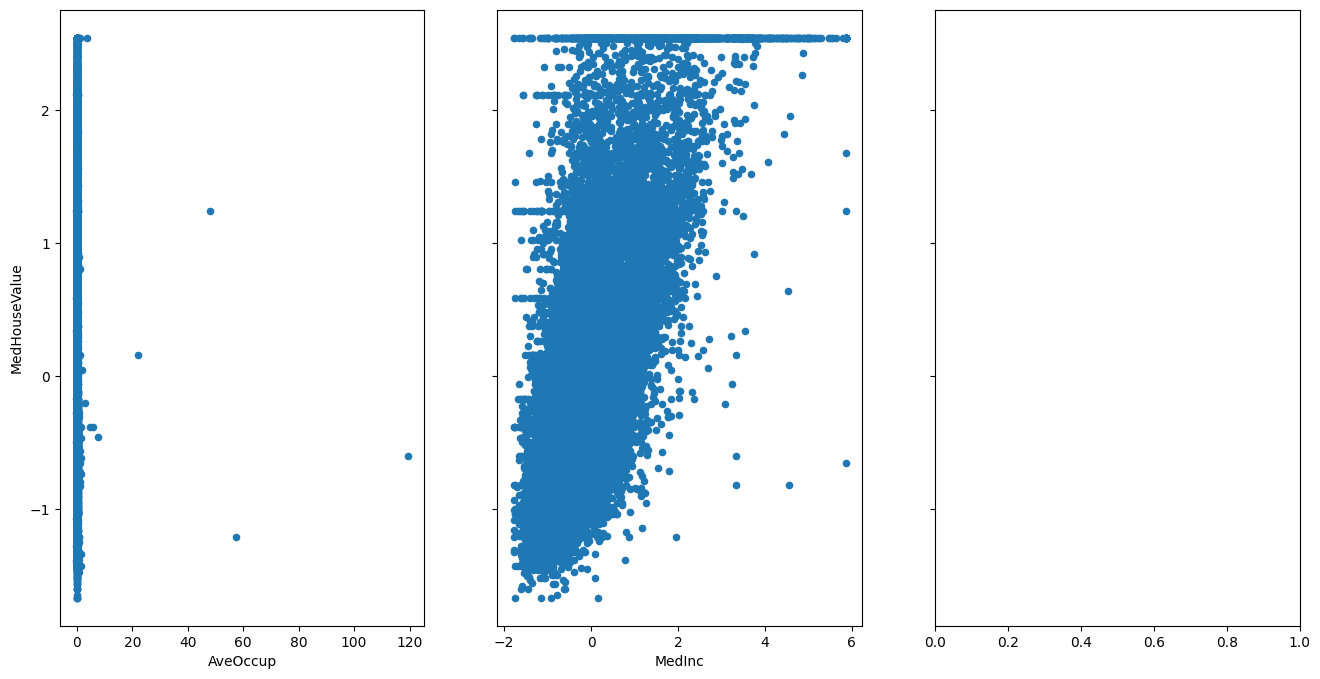

In [29]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='Longitude',y='MedHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='Latitude',y='MedHouseValue',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='HouseAge',y='MedHouseValue',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='AveRooms',y='MedHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='AveBedrms',y='MedHouseValue',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='Population',y='MedHouseValue',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='AveOccup',y='MedHouseValue',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='MedInc',y='MedHouseValue',ax=axs[1],figsize=(16,8))

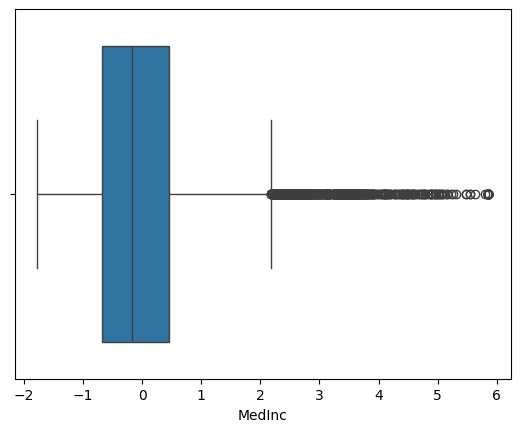

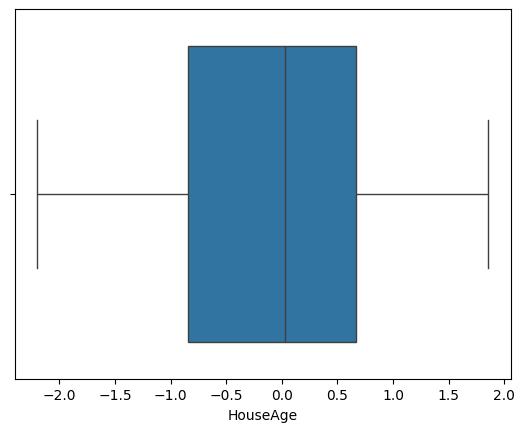

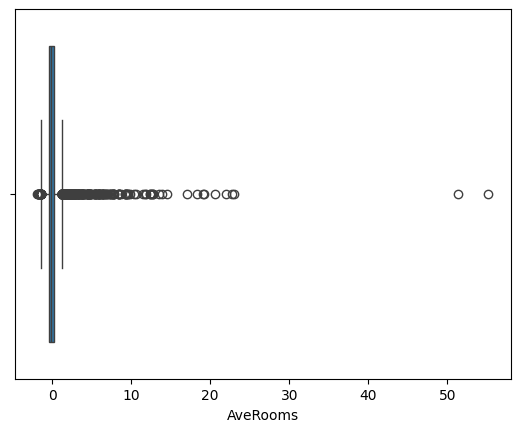

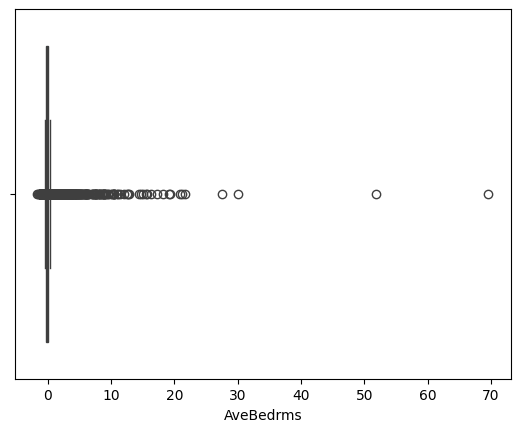

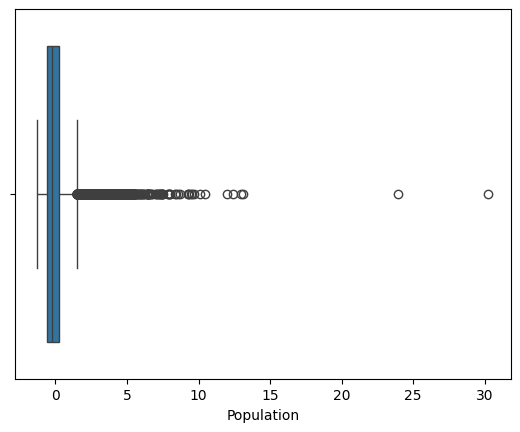

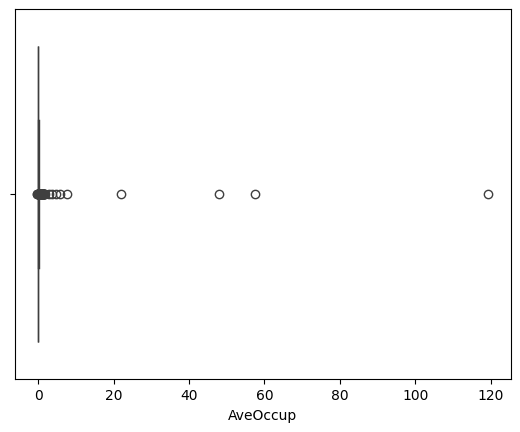

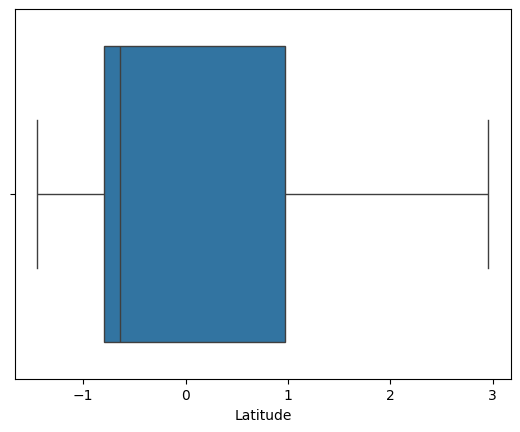

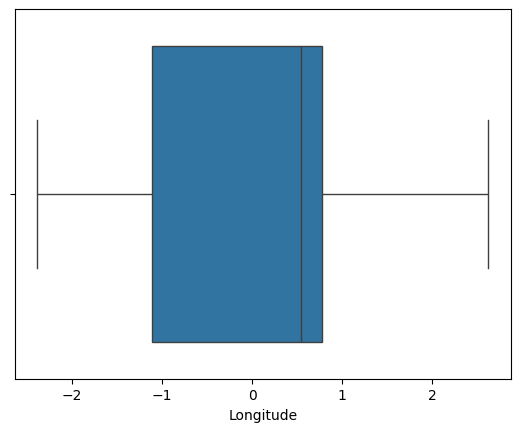

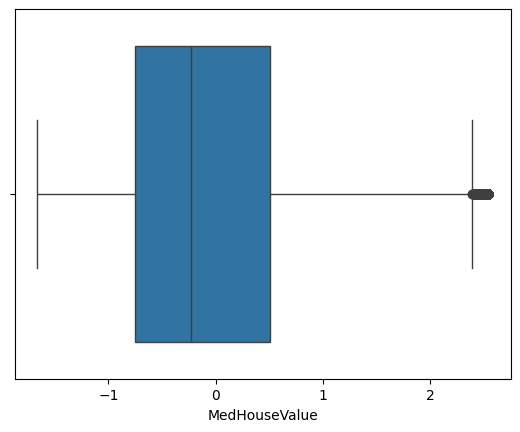

In [30]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

In [31]:
#5.Extract X and Y data :

X_Features=['Longitude', 'Latitude', 'HouseAge', 'AveRooms',
       'AveBedrms', 'Population', 'AveOccup', 'MedInc']
X=scaled_df[X_Features]
Y=scaled_df['MedHouseValue']

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [32]:
print(california_df.shape)
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 8)
(20640,)


In [33]:
#6. Split the dataset :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


In [ ]:
#7. Apply Various Algorithms:
#1.Linear Regression
#2.Decision Tree Regression
#3.Random Forest Regression (Ensemble Learning)
#4.Lasso
#5.Ridge
#6.Elastic Net

In [34]:
# 1.Perform Linear Regression :

##### Perform Linear Regression on training data.
#####Predict output for test dataset using the fitted model.
#####Print root mean squared error (RMSE) from Linear Regression.

linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [36]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [37]:
y_predict = linreg.predict(x_test)

In [38]:
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6303860650696056
0.5965968374812354


In [39]:
#2. Perform Decision Tree Regression :

####Perform Decision Tree Regression on training data.
####Predict output for test dataset using the fitted model.
####Print root mean squared error from Decision Tree Regression.

dtreg=DecisionTreeRegressor()
dtreg.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse')

In [43]:
y_predict = dtreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.6143097660433482
0.6169098997828322


In [45]:
#3. Perform Random Forest Regression :
####Perform Random Forest Regression on training data.
####Predict output for test dataset using the fitted model.
####Print RMSE (root mean squared error) from Random Forest Regression.
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()
rfreg.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10)

In [48]:
y_predict = rfreg.predict(x_test)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.4392038830340111
0.8041793751284102


In [50]:
#4. Perform Lasso Regression (determine which variables should be retained in the model):

####Perform Lasso Regression on training data.
####Predict output for test dataset using the fitted model.
####Print RMSE (root mean squared error) from Lasso Regression.


lassoreg=Lasso(alpha=0.001)
lassoreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

0.630326757504838
R2 Value/Coefficient of determination:0.5966727393295559


In [52]:
#5. Perform Ridge Regression (addresses multicollinearity issues) :

#Perform Ridge Regression on training data.
#Predict output for test dataset using the fitted model.
#Print RMSE (root mean squared error) from Ridge Regression.

ridgereg=Ridge(alpha=0.001)
ridgereg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

0.6303860579667828
R2 Value/Coefficient of determination:0.5965968465718587


In [69]:
#6. Perform ElasticNet Regression :

#Perform ElasticNet Regression on training data.
#Predict output for test dataset using the fitted model.
#Print RMSE (root mean squared error) from ElasticNet Regression.

#from sklearn.linear_model import ElasticNet
elasticreg=ElasticNet(alpha=0.001)
elasticreg.fit(x_train,y_train)
print(sqrt(mean_squared_error(y_test,elasticreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(elasticreg.score(x_test,y_test)))

0.6303027367217616
R2 Value/Coefficient of determination:0.5967034791067273


In [55]:

lm=smf.ols(formula='MedHouseValue ~ Longitude+Latitude+HouseAge+AveRooms+AveBedrms+Population+AveOccup+MedInc',data=scaled_df).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MedHouseValue   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:41:15   Log-Likelihood:                -19669.
No. Observations:               20640   AIC:                         3.936e+04
Df Residuals:                   20631   BIC:                         3.943e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.663e-16      0.004    6.1e-14      1.000      -0.009       0.009
Longitude     -0.7544      0.013    -57.682      0.000      -0.780      -0.729
Latitude      -0.7798      0.013    -58.541      0.000      -0.806      -0.754
HouseAge       0.1029      0.005     21.143      0.000       0.093       0.112
AveRooms      -0.2301      0.013    -18.235      0.000      -0.255      -0.205
AveBedrms      0.2649      0.012     22.928      0.000       0.242       0.288
Population    -0.0039      0.005     -0.837      0.402      -0.013       0.005
AveOccup      -0.0341      0.004     -7.769      0.000      -0.043      -0.025
MedInc         0.7190      0.007    104.054      0.000       0.705       0.732
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Perform Linear Regression with one independent variable :

#Extract just the median_income column from the independent variables (from X_train and X_test).
#Perform Linear Regression to predict housing values based on median_income.
#Predict output for test dataset using the fitted model.
#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [57]:
x_train_Income=x_train[['MedInc']]
x_test_Income=x_test[['MedInc']]

In [58]:
print(x_train_Income.shape)
print(y_train.shape)

(16512, 1)
(16512,)


In [76]:
# visualize relationship between features


linreg=LinearRegression()
linreg.fit(x_train_Income,y_train)
y_predict = linreg.predict(x_test_Income)

In [77]:
#print intercept and coefficient of the linear equation
print(linreg.intercept_, linreg.coef_)
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.0056230198668934615 [0.69238221]
0.7212595914243148
0.4719083593446771


In [78]:
#Insight:
#Looking at the above values we can say that coefficient: a unit increase in median_income increases the median_house_value by 0.692 unit

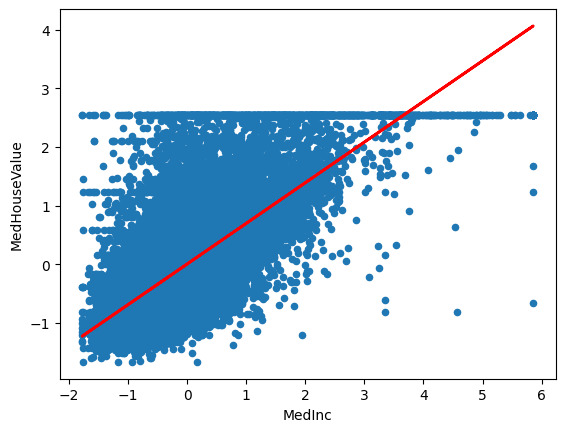

In [79]:
#plot least square line
scaled_df.plot(kind='scatter',x='MedInc',y='MedHouseValue')
plt.plot(x_test_Income,y_predict,c='red',linewidth=2)

In [ ]:
# Hypothesis testing and P values:
"""using the null hypothesis lets assume there is no relationship between median_income and median_house_value
Lets test this hypothesis. We shall reject the Null Hypothesis if 95% confidence inderval does not include 0"""

In [80]:
lm=smf.ols(formula='MedHouseValue ~ MedInc',data=scaled_df).fit()

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MedHouseValue   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:15:01   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.753e-16      0.005   9.41e-14      1.000      -0.010       0.010
MedInc         0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#INSIGHT:
"""The P value is 0.000 indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
 so, there is a strong relationship between median_house_value and median_income"""